# Timeseries demo

This notebook demonstrates the wetwin tools for a few time-series in csv files.

In [1]:
# Import external packages

# arrays
import pandas as pd
import numpy as np
import datetime
# plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [10, 3]
# gui elements
import ipywidgets as widgets
import wetwin as wt

In [2]:
# load time-series from local file and plot
def myparser(datetime_str):
    return datetime.datetime.strptime(datetime_str, '%Y%m%d%H%M')

locations = ["vlissingen","hoekvanholland","denhelder","harlingen","delfzijl"]
series = {}
for location in locations: # load data
    df = pd.read_csv(f'data/{location}.csv',sep='\s+',header=11,parse_dates=[0],date_parser=myparser,names=["time","sea_level"])
    series[location]={ "times" : df["time"],"values" : df["sea_level"] }

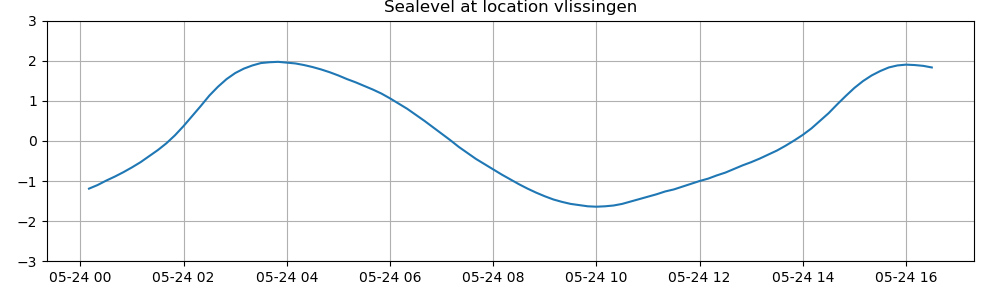

signal from dropdown
set value of station to denhelder

dropdown receives signal from variable station. Value is denhelder

signal from dropdown
set value of station to delfzijl

dropdown receives signal from variable station. Value is delfzijl

signal from dropdown
set value of station to hoekvanholland

dropdown receives signal from variable station. Value is hoekvanholland

signal from dropdown
set value of station to vlissingen

dropdown receives signal from variable station. Value is vlissingen



In [4]:
# A listbox to select the location
v_loc=wt.ListVariable("station","Station name",locations)
sel_loc=wt.WtListDropdown(v_loc)

# A plot to show the time-series
class MyPlot1(wt.wtPlot):
    def __init__(self,variables,series,*args,**kwargs): # You can add your own arguments before *args
        super().__init__(variables,*args,**kwargs)
        self.series=series
    def redraw(self):
        ax=self.ax
        location=self.variables[0].value_str
        t = self.series[location]["times"]
        y = self.series[location]["values"]
        ax.plot(t,y, color='C0')
        plt.title(f"Sealevel at location {location}")
        ax.set_ylim([-3, 3])
        ax.grid(True)

# Create a plot
p1=MyPlot1([v_loc],series) #create plot linked to variable v_loc (location)
gui=widgets.VBox([sel_loc,p1]) #vertical stack of listbox and plot
display(gui)
p1.redraw() #draw initial plot